100%|██████████| 170M/170M [00:03<00:00, 44.1MB/s]


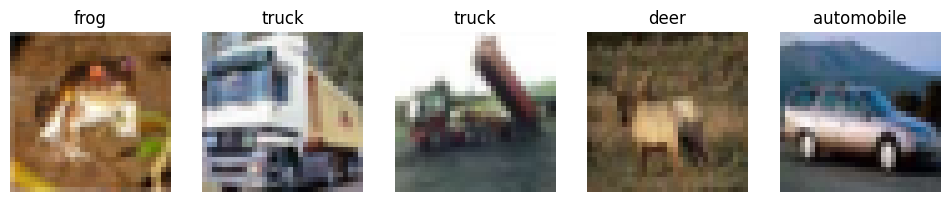

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import torchvision
import torchvision.transforms as transforms

# Load CIFAR-10
transform = transforms.ToTensor()
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
classes = trainset.classes

#Showing some images to check the data
import numpy as np
fig, axes = plt.subplots(1, 5, figsize=(12, 3))
for i in range(5):
    image, label = trainset[i]
    axes[i].imshow(np.transpose(image.numpy(), (1, 2, 0)))
    axes[i].set_title(classes[label])
    axes[i].axis('off')
plt.show()


In [8]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [9]:
import torch
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters
batch_size = 64
learning_rate = 0.001
num_epochs = 10

# Transforms
transform = transforms.Compose([transforms.ToTensor()])

# Datasets and loaders
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Model, Loss, Optimizer
model = SimpleCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [11]:
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

KeyboardInterrupt: 

In [12]:
model.eval()  # Set model to evaluation mode
correct = 0
total = 0
y_true = []
y_pred = []


In [13]:
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)


In [14]:
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")


Test Accuracy: 75.00%


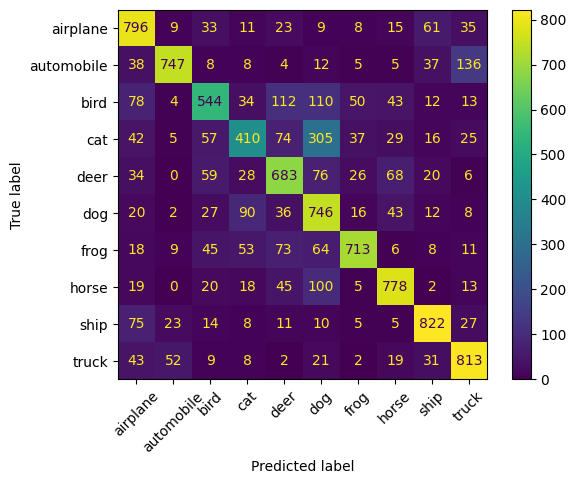

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt # Import matplotlib for plotting

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_dataset.classes) # Use test_dataset.classes for labels
disp.plot(xticks_rotation=45)
plt.show() # Add plt.show() to display the plot